# Description of the notebook

## Table of contents

1. [Part 1. Description of the notebook](#description-of-the-notebook)
2. [Part 2. Q&A EDA](#part-2-qa-eda)
   1. [Question 1. What are the Top 5 countries in which billionaires reside and what proportion they represent?](#question-1-what-are-the-top-5-countries-in-which-billionaires-reside-and-what-proportion-they-represent)
   2. [Question 2. What are the Top 5 cities in which billionaires reside and what proportion they represent?](#question-2-what-are-the-top-5-cities-in-which-billionaires-reside-and-what-proportion-they-represent)
   3. [Question 3. How are billionaires distributed by continent and what proportion they represent?](#question-3-how-are-billionaires-distributed-by-continent-and-what-proportion-they-represent)
   4. [Question 4. Which are the industries that produce the most billionaires?](#question-4-which-are-the-industries-that-produce-the-most-billionaires)
   5. [Question 5. What is the most common age for billionaires?](#question-5-what-is-the-most-common-age-for-billionaires)
   6. [Question 6. What is the overall distribution of billionaires by gender in the Top 5 countries?](#question-6-what-is-the-overall-distribution-of-billionaires-by-gender-in-the-top-5-countries)
   7. [Question 7. Box plot to see the distribution of wealth across top 5 countries](#question-7-box-plot-to-see-the-distribution-of-wealth-across-top-5-countries)
   8. [Question 8. Billionaires age distribution](#question-8-billionaires-age-distribution)
   9. [Question 9. What are the most common birth day, month and year for billionaires?](#question-9-what-are-the-most-common-birth-day-month-and-year-for-billionaires)
   10. [Question 10. Country pop and number of billionaires. What is the frequence of being a billionaire in the Top 5 countries?](#question-10-country-pop-and-number-of-billionaires-what-is-the-frequence-of-being-a-billionaire-in-the-top-5-countries)

## Part 1. Importing libraries, changing settings to display all columns and loading the dataset

In the first part of the notebook, all the needed libraries to perform the analysis will be imported. Also, the dataset will be loaded to take a look at it and make any adjustment if necessary before the EDA.

[Go back to the table of contents](#table-of-contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [2]:
# Setting option to display all columns when viewing the dataset.

pd.set_option('display.max_columns', None)

In [3]:
# Loading the dataset to be used in the EDA process

df_ready = pd.read_csv('df_ready.csv')

In [4]:
# Taking a first look to it using the head() function

df_ready.head(3)

,position,wealth,category,full_name,age,country_of_residence,city_of_residence,source,citizenship,organization,gender,birth_date,last_name,first_name,title,residence_state,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,LVMH Moët Hennessy Louis Vuitton,M,1949-03-05,Arnault,Bernard,Chairman and CEO,No subdivisions info,No subdivisions info,1949,3,5,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,Tesla,M,1971-06-28,Musk,Elon,CEO,Texas,South,1971,6,28,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,Amazon,M,1964-01-12,Bezos,Jeff,Chairman and Founder,Washington,West,1964,1,12,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America


In [5]:
# Finding the number of rows, columns, and total values of the dataset

display(df_ready.shape)
display(df_ready.size)

(2591, 32)

82912

In [6]:
# Converting back the birth_date column to date type

df_ready['birth_date'] = pd.to_datetime(df_ready['birth_date']).dt.strftime('%Y/%m/%d')
df_ready['birth_date'] = pd.to_datetime(df_ready['birth_date'], format='%Y/%m/%d')

In [7]:
# Verifying the changes

df_ready.dtypes

position                         int64
wealth                           int64
category                        object
full_name                       object
age                              int64
country_of_residence            object
city_of_residence               object
source                          object
citizenship                     object
organization                    object
gender                          object
birth_date              datetime64[ns]
last_name                       object
first_name                      object
title                           object
residence_state                 object
residence_region                object
birth_year                       int64
birth_month                      int64
birth_day                        int64
cpi_country                     object
cpi_change_country              object
gdp_country                      int64
g_tertiary_ed_enroll           float64
g_primary_ed_enroll            float64
life_expectancy          

## Part 2. Q&A EDA

This part delves into questions about the billionaire dataset, employing code-driven analyses to unveil key insights. The exploration covers diverse aspects, including geographical concentration, industry dominance, age demographics, gender distribution and wealth patterns.

This list of questions is designed to provide a comprehensive understanding of the billionaires' landscape around the world.

[Go back to the table of contents](#table-of-contents)

### Question 1. What are the Top 5 countries in which billionaires reside and what proportion they represent?

In [8]:
# Calculating the columns of the summary dataset

country_billions = df_ready['country_of_residence'].value_counts().head(5)
perc_1 = round((country_billions) / df_ready.shape[0] * 100,2)
c_perc_1 = perc_1.cumsum()

# Creating and displaying the dataset

q1_df = pd.DataFrame({
    'Country': country_billions.index,
    'Billionaires count': country_billions.values,
    'Percentage over total': perc_1.values,
    'Cumulative Percentage': c_perc_1.values
})

display(q1_df)

,Country,Billionaires count,Percentage over total,Cumulative Percentage
0,United States,754,29.10,29.10
1,China,515,19.88,48.98
2,India,157,6.06,55.04
3,Germany,102,3.94,58.98
4,United Kingdom,82,3.16,62.14


**Insights:**

1. The country with more billionaires is the United States with 754, followed by China with 515. Between the two, they account for nearly half of the total billionaires presented in the dataset.

2. Despite having the same population, China has almost three times the number of billionaires than India, who is in third place with 157 billionaires presented in the dataset.

3. Germany and the United Kingdom appear in third and fourth positions, with 102 and 82 billionaires in the order given.

4. In total, the Top 5 countries are the home of ~62% of the total number of billionaires presented in the dataset.



### Question 2. What are the Top 5 cities in which billionaires reside and what proportion they represent?

In [186]:
# Calculating the columns of the summary dataset

city_billions = df_ready['city_of_residence'].value_counts().head(5)
perc_2 = round((city_billions) / df_ready.shape[0] * 100,2)
c_perc_2 = perc_2.cumsum()

# Creating and displaying the dataset

q2_df = pd.DataFrame({
    'City': city_billions.index,
    'Billionaires count': city_billions.values,
    'Percentage over total': perc_2.values,
    'Cumulative Percentage': c_perc_2.values
})

display(q2_df)

,City,Billionaires count,Percentage over total,Cumulative Percentage
0,New York,99,3.82,3.82
1,Beijing,68,2.62,6.44
2,Hong Kong,67,2.59,9.03
3,Shanghai,62,2.39,11.42
4,London,61,2.35,13.77


**Insights:**

1. With 99 billionaires, New York ranks first as the city in which more billionaires have their residence.

2. The Special Administrative Region (SAR) of Hong Kong is the residence of 68 billionaires, ranking second in the Top.

3. Beijing and Shanghai are the most popular popular cities for chinese billionaires with 68 and 62 of them in the order given. They rank second and fourth in the Top.

4. London is the last city to appear in the ranking in the fifth place, only behind Shanghai by 1 billionaire. If we take into account the previous question, we can see that out of 82 billionaires that reside in the United Kingdom, 61 live in London (a proportion of ~74%).

5. If we consider Hong Kong to be part of China, we can see that 3 cities of the Top 5 are located in this country.

6. The cities in the Top 5 account for ~14% of the billionaires, with none of them surpassing 4% of total on their own.

### Question 3. How are billionaires distributed by continent and what proportion they represent?

In [10]:
# Calculating the columns of the summary dataset

cont_billions = df_ready['continent'].value_counts()
perc_3 = round((cont_billions) / df_ready.shape[0] * 100,2)
c_perc_3 = perc_3.cumsum()

# Creating and displaying the dataset

q3_df = pd.DataFrame({
    'Continent': cont_billions.index,
    'Billionaires count': cont_billions.map('{:,}'.format).values,
    'Percentage over total': perc_3.values,
    'Cumulative Percentage': np.minimum(c_perc_3.values, 100)
})

display(q3_df)

,Continent,Billionaires count,Percentage over total,Cumulative Percentage
0,Asia,"1,062",40.99,40.99
1,North America,818,31.57,72.56
2,Europe,592,22.85,95.41
3,South America,57,2.20,97.61
4,Oceania,45,1.74,99.35
5,Africa,17,0.66,100.00


**Insights:**

1. Asia is the continent where more billionaires live, and the only one who surpasses the thousand count, followed by North America in second place with 818 billionaires and Europe with 592.

2. These three continents comprises almost every billionaire presented in the dataset (~95%). The presence of South America, Oceania and Africa is testimonial.It should be noted the scarce presence of this last one in the data. Africa is the second most populous continent behind Asia but only has 17 billionaires.

[Go back to the table of contents](#table-of-contents)

### Question 4. Which are the industries that produce the most billionaires?

In [11]:
# Calculating the columns of the summary dataset

cat_billions = df_ready['category'].value_counts().head(5)
perc_4 = round((cat_billions) / df_ready.shape[0] * 100,2)
c_perc_4 = perc_4.cumsum()

# Creating and displaying the dataset

q4_df = pd.DataFrame({
    'Industry': cat_billions.index,
    'Billionaires count': cat_billions.map('{:,}'.format).values,
    'Percentage over total': perc_4.values,
    'Cumulative Percentage': c_perc_4.values
})

display(q4_df)

,Industry,Billionaires count,Percentage over total,Cumulative Percentage
0,Finance & Investments,364,14.05,14.05
1,Manufacturing,316,12.20,26.25
2,Technology,312,12.04,38.29
3,Fashion & Retail,261,10.07,48.36
4,Food & Beverage,207,7.99,56.35


**Insights:**

1. Finance & Investments is the industry that produces most billionaires, followed by Manufacturing and Technology. These three categories are almost equally capable to produce wealthy individuals (with Finance & Investments having a slight advantage over the other two).

2. Fashion and Food industries complete the Top 5, with a billionaires count over 200.

3. Overall, these 5 industries comprises more than half the billionaires present in the dataset (~56%).

### Question 5. What is the most common age for billionaires?

In [12]:
# Calculating the columns of the summary dataset

age_billions = df_ready['age'].value_counts().head(5)
perc_5 = round((age_billions) / df_ready.shape[0] * 100,2)
c_perc_5 = perc_5.cumsum()

# Creating and displaying the dataset

q5_df = pd.DataFrame({
    'Age': age_billions.index,
    'Billionaires count': age_billions.map('{:,}'.format).values,
    'Percentage over total': perc_5.values,
    'Cumulative Percentage': c_perc_5.values
})

display(q5_df)

,Age,Billionaires count,Percentage over total,Cumulative Percentage
0,59,101,3.90,3.90
1,60,87,3.36,7.26
2,58,82,3.16,10.42
3,65,81,3.13,13.55
4,67,76,2.93,16.48


**Insights:**

1. The most common age for billionaires is 59 years, the only value that surpasses with more than 100 counts. It's followed by 60 and 58 years with 87 and 82 billionaires in the order given. These three values account for ~10% of the total.

2. All ages with most billionaire count are close or surpass the retirement age in most of the countries (60-65 years depending on the case).

### Question 6. What is the overall distribution of billionaires by gender in the Top 5 countries?

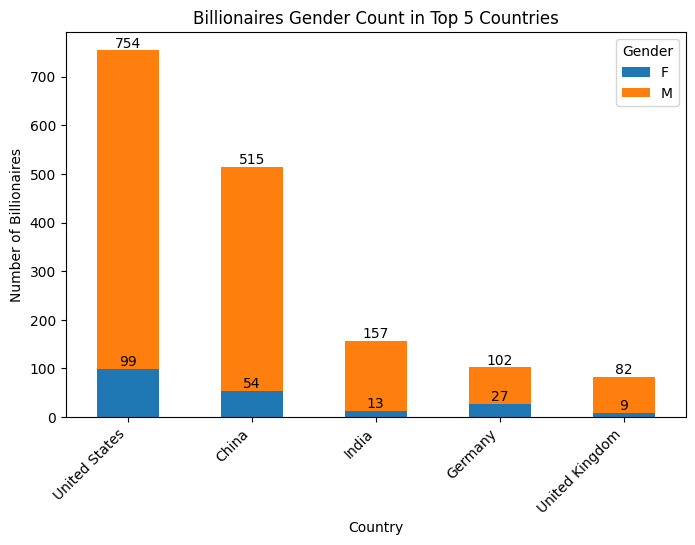

In [29]:


# Extract Top 5 countries with more billionaires

top5_countries = df_ready['country_of_residence'].value_counts().head(5).index

# Group by country and gender, and count the number of billionaires

gender_dist = df_ready[df_ready['country_of_residence'].isin(top5_countries)].groupby(['country_of_residence', 'gender']).size().unstack()

# Sort countries by the total number of billionaires

sorted_countries_gender = gender_dist.sum(axis=1).sort_values(ascending=False).index
gender_dist = gender_dist.loc[sorted_countries_gender]

ax = gender_dist.plot(kind='bar', stacked=True, figsize=(8, 5))

# Adding labels to each bar

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Adding elements to make the chart more informative and displaying it

plt.title('Billionaires Gender Count in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


In [36]:
# Creating two new columns in the gender_dist dataframe to display gender proportions

gender_dist['F_proportion'] = gender_dist['F'] / gender_dist.sum(axis=1)
gender_dist['M_proportion'] = gender_dist['M'] / gender_dist.sum(axis=1)

# Displaying the dataframe with the gender proportions by country and the overall gender proportion

display(gender_dist)
display(df_ready['gender'].value_counts(normalize=True))

gender,F,M,F_proportion,M_proportion
country_of_residence,,,,
United States,99,655,0.13,0.87
China,54,461,0.10,0.89
India,13,144,0.08,0.91
Germany,27,75,0.26,0.73
United Kingdom,9,73,0.11,0.88


gender
M   0.88
F   0.12
Name: proportion, dtype: float64

**Insights:**

1. In the Top 5 countries, there are much more male billionaires that females regardless of geographic location and economic development.

2. The overall proportion is ~88% males and ~12 females. 4 out of 5 countries in the Top have a similar distribution. The only exception is Germany, whose distribution is the most egalitarian towards females, although it continues to show male dominance by 3 male billionaires for every female billionaire.

3. The country where female billionaires comprises the lowest percentage in the Top is India, with less than 10%. In absolute terms, there are only 9 female billionaires in the United Kingdom, the lowest number in the Top.

4. In contrast with the above point, the maximum number of both, male and female billionaires can be found in the United States, due to their highest overall number of billionaires.

[Go back to the table of contents](#table-of-contents)

### Question 7. Box plot to see the distribution of wealth across top 5 countries

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1284\964695486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country_of_residence', y='wealth', data=df_ready[df_ready['country_of_residence'].isin(top5_countries)], showfliers=False, palette=sns.color_palette('viridis', n_colors=len(top5_countries)))


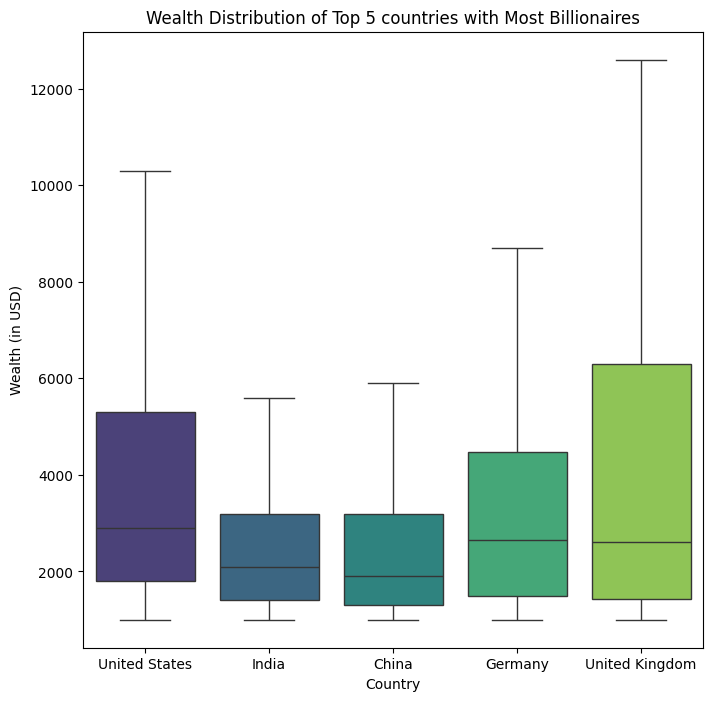

In [55]:
# Creating a box plot using the subset for top5_countries

top5_countries = df_ready['country_of_residence'].value_counts().head(5).index
plt.figure(figsize=(8,8))
sns.boxplot(x='country_of_residence', y='wealth', data=df_ready[df_ready['country_of_residence'].isin(top5_countries)], showfliers=False, palette=sns.color_palette('viridis', n_colors=len(top5_countries)))
plt.title('Wealth Distribution of Top 5 countries with Most Billionaires')
plt.xlabel('Country')
plt.ylabel('Wealth (in USD)')
plt.show()


In [65]:
# Creating a summary to provide further understanding of the values appearing in the boxplot

box_plot_summary = df_ready[df_ready['country_of_residence'].isin(top5_countries)].groupby('country_of_residence')['wealth'].describe()[['25%', '50%', '75%']]

box_plot_summary.columns = ['Q1 ($B)', 'Median wealth ($B)', 'Q3 ($B)']
display(box_plot_summary)

,Q1 ($B),Median wealth ($B),Q3 ($B)
country_of_residence,,,
China,1300.00,1900.00,3200.00
Germany,1500.00,2650.00,4475.00
India,1400.00,2100.00,3200.00
United Kingdom,1425.00,2600.00,6300.00
United States,1800.00,2900.00,5300.00


**Insights:**

1. The maximum values for the first and second quartile are in the United States, while the maximum value for the third quartile is located in the United Kingdom, with the United States in the second place. This suggests that there is a significant range of billionaire wealth in the higher end for these countries as well as the potential presence of outlier values with extremely high net worth.

2. India and China have similar distributions regarding the three metrics. China has a little bigger upper whisker and quartile 3 and a lower median, which indicates the presence of more billionaires in the upper values of the billionaire distribution, that is, a slightly more unequal wealth distribution than India's.

3. Germany's wealth distribution is similar to the United Kindgom in quartiles 1 and 2 but has a much lower value for quartile 3. This suggests a wealth distribution more concentrated around the median, with fewer individuals with extreme wealth and less potential outliers.

### Question 8. Billionaires age distribution

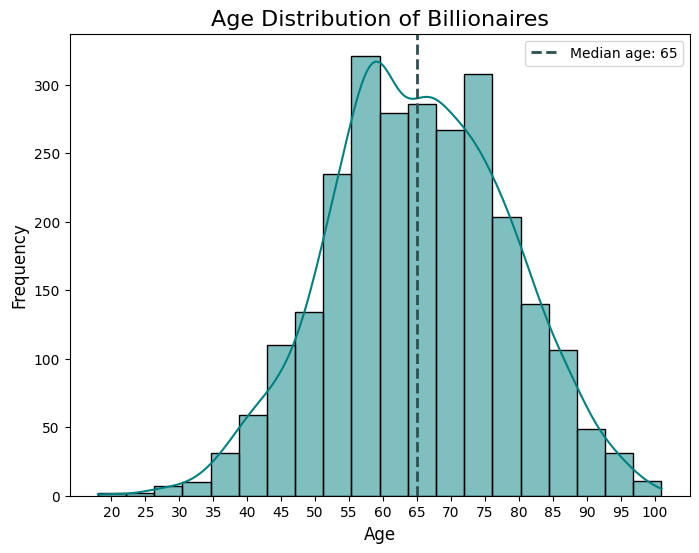

In [90]:

# Setting up the figure size and plotting the histogram of billionaire ages

plt.figure(figsize=(8, 6))
sns.histplot(df_ready['age'], bins=20, kde=True, color='teal', edgecolor='black')

# Add a vertical line for the median age
median_age = df_ready['age'].median()
plt.axvline(median_age, color='darkslategray', linestyle='dashed', linewidth=2, label=f'Median age: {int(median_age)}')

# Adding elements to improve readability and more information to the chart

plt.title('Age Distribution of Billionaires', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(20, 101, 5))
plt.legend()

plt.show()

**Insights:**

1. The most frequent values for billionaire's ages are around 60 years old. This aligns with the values obtained in the Question 5, where 58, 59 and 60 appeared as values with high frequence of billionaires.

2. The histogram also shows a second age peak around 75 years. Diving deeper into this, it's clear there is more frequency for high values than lower ones, which suggests a positive correlation between wealth accumulation and age. If we look at the first and bottom four bins (from 20 to 35 and from 85 to 100), we can see a much higher frequence for these last ones.

3. The two peaks mentioned are almost equally in terms of frequency and the median value of the billionaires is located between them, although more close to 60 years than 75, indicating the prevalence of this age.

### Question 9. What are the most common birth day, month and year for billionaires?

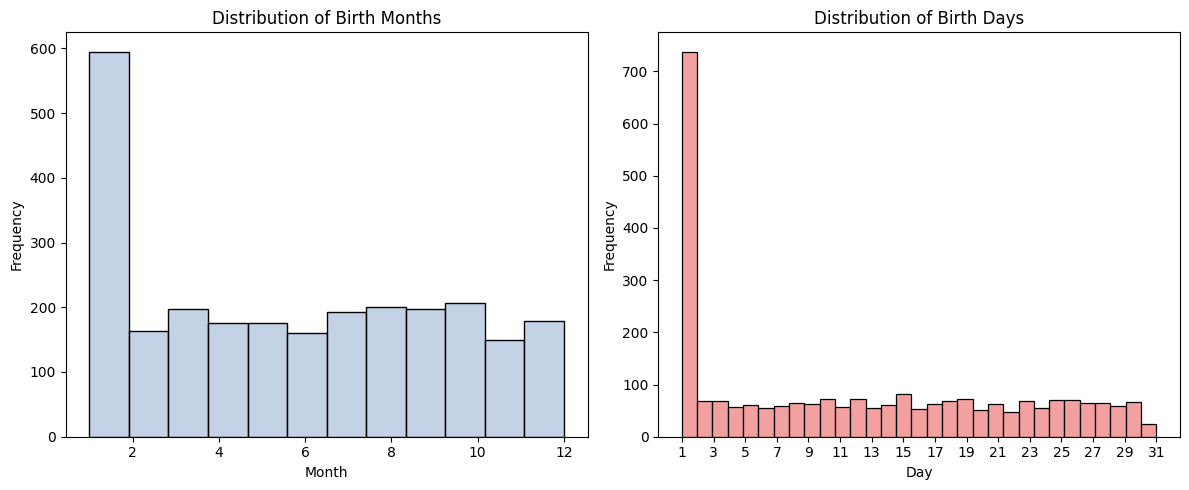

In [100]:
# Setup the figure and axes

fig, axes = plt.subplots(1,2, figsize=(12,5))

# Plotting the distribution of birth months

sns.histplot(df_ready['birth_month'], bins=12, kde=False, ax=axes[0], color='lightsteelblue')
axes[0].set_title('Distribution of Birth Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')
plt.xticks(range(1, 13, 1))

# Plot the distribution of birth days

sns.histplot(df_ready['birth_day'], bins=31, kde=False, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Birth Days')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')
plt.xticks(range(1, 32, 2))

# Adjust layout

plt.tight_layout()
plt.show()

**Insights:**

1. Borth charts display a disproportionate frequency for day 1 and January. This could be due to one or all of the following:

   1. There might be a bias in data entry, where the default or missing values are set to January 1st. It's possible that creating the synthetic birth dates using the most frequent values for each country to replace null values could have contributed to exacerbate frequencies for these values.
   2. Some individuals might have chosen to keep their birthdate private. In such cases, a common placeholder for birth date could be January 1st. This is related with the above point.
2. Other than this frequency, the other values follow an even distribution for both variables, with some lows (like november in the birth month plot or 31st in the birth day plot) and highs (like october for months and 15th for days).

### Question 10. Country pop and number of billionaires. What is the frequency of being a billionaire in the Top 5 countries?

In [185]:
# Calculating the columns of the summary dataset

density_billions = df_ready['country_of_residence'].value_counts().head(5)
billions_number = density_billions
country_pop = df_ready.groupby('country_of_residence')['country_pop'].max()

# Creating and displaying the dataset

q10_df = pd.DataFrame({
    'Country': density_billions.index,
    'Billionaires Count': density_billions.values,
    'Country Population': country_pop.loc[density_billions.index].values,
})

q10_df['Billionaire Density'] = q10_df['Country Population'] / q10_df['Billionaires Count']
display(q10_df)


,Country,Billionaires Count,Country Population,Billionaire Density
0,United States,754,328239523,435330.93
1,China,515,1397715000,2714009.71
2,India,157,1366417754,8703297.80
3,Germany,102,83132799,815027.44
4,United Kingdom,82,66834405,815053.72


In [182]:
q10_df['Sentence'] = [f'In {row["Country"]}, there is one billionaire every {int(row["Billionaire Density"]):,} persons.' for index, row in q10_df.iterrows()]

# Display the sentences
for sentence in q10_df['Sentence']:
    print(sentence)



In United States, there is one billionaire every 435,330 persons.
In China, there is one billionaire every 2,714,009 persons.
In India, there is one billionaire every 8,703,297 persons.
In Germany, there is one billionaire every 815,027 persons.
In United Kingdom, there is one billionaire every 815,053 persons.


**Insights:**

1. From the summary table and the above sentences, it's clear that the highest density of billionaires can be found in the United States, reflecting a more conductive environment for wealth creation and economic opportunities.
2. Both, Germany and the United Kingdom have almost identical values in this measure.

3. Despite their impressive economic growth in recent decades, China has a lower billionaire density in comparison with advanced economies. This ratio is expected to be reduced in the following years if the Chinese economy continues its development, but it's far from even European Countries right now.

4. India has the lowest billionaire density among the countries in the Top 5, which reflects an economy that has a lot of potential but has only beginning to growth in a consistent way in recent years.


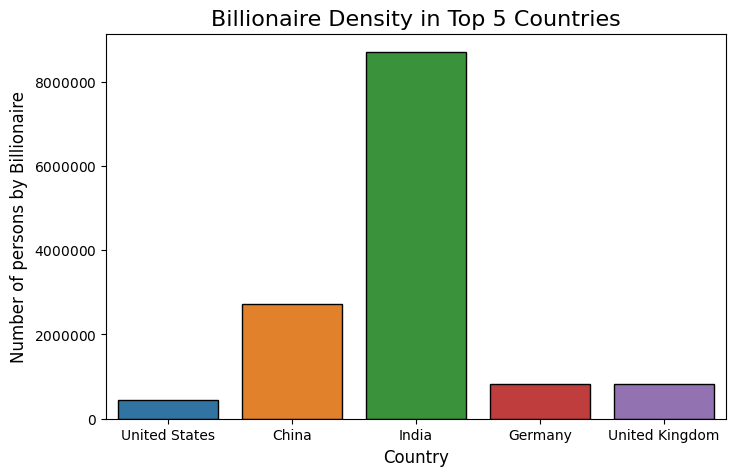

In [184]:
# Creating a bar plot to further understand the billionaire density indicator

plt.figure(figsize=(8,5))
sns.barplot(x='Country', y='Billionaire Density', data=q10_df, hue='Country', edgecolor='black')

# Adding elements to make the chart more appealing

plt.title('Billionaire Density in Top 5 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of persons by Billionaire', fontsize=12)
plt.ticklabel_format(style='plain', axis='y', useMathText=True, scilimits=(6,6))

plt.show()

**Note**: Due to how this measure is calculated (total population divided by the number of billionaires in each country), the graph can be misinterpreted with ease. Higher values imply a low presence of billionaires among the overall population. Although the presence of wealthy individuals is not representative of an advanced economy by itself and should be considered in conjunction with other economic indicators, it provides a standard way to compare how frequent is to find these types of individuals in a particular society and can be considered as a proxy of how wealth a society is.

[Go back to the table of contents](#table-of-contents)